## Challenge Set 3
Topic:        Play with Models and Learning Curves

Date:         07/23/2016

Name:         Adam Levin

Worked with:  None

In [533]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

**Challenge 1**

Creating the data

In [534]:
x = np.random.uniform(0,25,size=10000)

In [535]:
y = 15 + -1.1*np.log(x) + np.random.normal(0,.5,10000)

Visualizing it

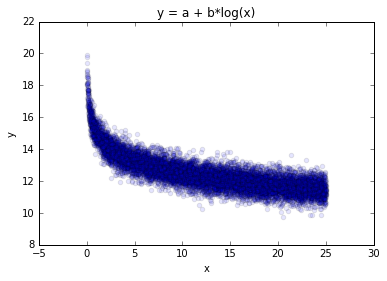

In [536]:
plt.scatter(x,y,alpha=.1);
plt.title('y = a + b*log(x)');
plt.xlabel('x');
plt.ylabel('y');

Fitting a quadratic model

In [537]:
ols = LinearRegression()

In [538]:
ols.fit((x**2).transpose()[:,None],y.transpose())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Visualize the fit

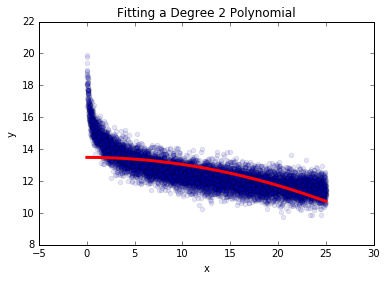

In [539]:
plt.scatter(x,y,alpha=.1);
plt.plot(np.sort(x),ols.predict((np.sort(x)**2).transpose()[:,None]),c='r',lw=3);
plt.xlabel('x');
plt.ylabel('y');
plt.title('Fitting a Degree 2 Polynomial');

Scoring the fit

In [540]:
ols.score((x**2).transpose()[:,None],y)

0.47525024900733359

Fitting a logarithmic model

In [541]:
ols.fit((np.log(x)).transpose()[:,None],y.transpose())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Visualizing the Fit

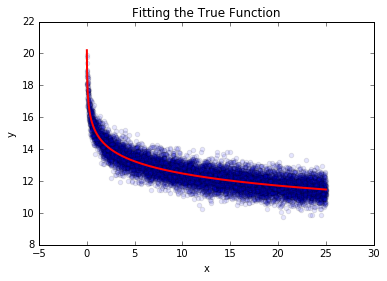

In [542]:
plt.scatter(x,y,alpha=.1);
plt.plot(np.sort(x),ols.predict((np.log(np.sort(x))).transpose()[:,None]),c='r',lw=2);
plt.xlabel('x');
plt.ylabel('y');
plt.title('Fitting the True Function');

That's pretty good! The score is..

In [543]:
ols.score((np.log(x)).transpose()[:,None],y)

0.82250035098027074

**Challenge 2**

Creating data

In [544]:
y = 122.1 - 4.8*x + 8.9*x**2 + np.random.normal(0,350,10000)

Visualizing it

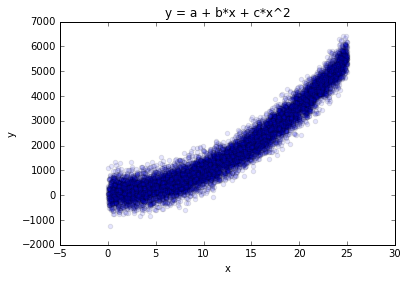

In [545]:
plt.scatter(x,y,alpha=.1);
plt.xlabel('x');
plt.ylabel('y');
plt.title('y = a + b*x + c*x^2');

Splitting

In [546]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=23)

Fitting model to train set

In [547]:
ols.fit(np.column_stack((x_train,x_train**2)),y_train.transpose())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Calculating MSE on train set

In [548]:
mean_squared_error(y_train,ols.predict(np.column_stack((x_train,x_train**2))))

124133.56926035388

Calculating MSE on test set

In [549]:
mean_squared_error(y_test,ols.predict(np.column_stack((x_test,x_test**2))))

124159.00890075104

**Challenge 3**

Running the models

In [550]:
train_errors,test_errors,r_squareds,aics = [],[],[],[]
X_train,X_test = np.empty((len(x_train),0)),np.empty((len(x_test),0))
ols = LinearRegression(fit_intercept=False)
for deg in range(8):
    X_train = np.hstack((X_train,(x_train**deg).transpose()[:,None]))
    X_test = np.hstack((X_test,(x_test**deg).transpose()[:,None]))
    ols.fit(X_train,y_train.transpose())
    train_errors.append(mean_squared_error(y_train,ols.predict(X_train)))
    test_errors.append(mean_squared_error(y_test,ols.predict(X_test)))
    r_squareds.append(ols.score(X_train,y_train.transpose()))
    aics.append(sm.OLS(y_train, X_train).fit().aic)

Plotting Training and Testing Errors

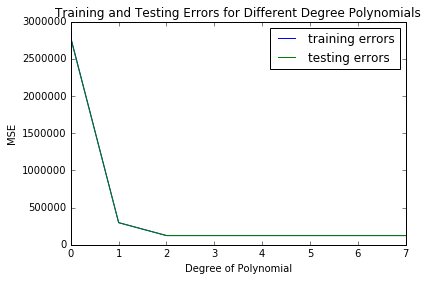

In [551]:
plt.plot(range(8),train_errors,label='training errors')
plt.plot(range(8),test_errors,label='testing errors');
plt.legend();
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.title('Training and Testing Errors for Different Degree Polynomials');

Which degree has the lowest test error?

In [552]:
np.argmin(test_errors)

7

Plotting R-squareds

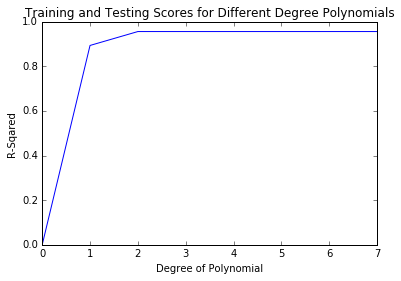

In [553]:
plt.plot(range(8),r_squareds,label='r-squared');
plt.xlabel('Degree of Polynomial')
plt.ylabel('R-Sqared')
plt.title('Training and Testing Scores for Different Degree Polynomials');

Which degree has the highest r-squared?

In [554]:
np.argmax(r_squareds)

7

Plotting AICs

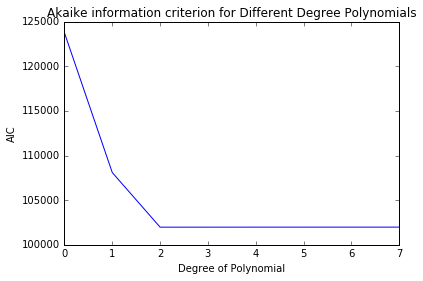

In [555]:
plt.plot(range(8),aics,label='AIC');
plt.xlabel('Degree of Polynomial')
plt.ylabel('AIC')
plt.title('Akaike information criterion for Different Degree Polynomials');

Which degree has the lowest AIC?

In [556]:
np.argmin(aics)

2

AIC is very robust and seems to always choose 2 - the true model's highest degree.

Let's visualize the predictions of the 7 degree polynomial.

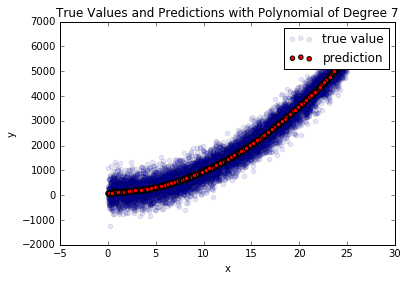

In [557]:
plt.scatter(x,y,alpha=.1,label='true value');
plt.scatter(x_train,ols.predict(X_train),label='prediction',c='r');
plt.legend();
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Values and Predictions with Polynomial of Degree 7');

**Challenge 4**

I will vary the training size from 10 to 990 so I can avoid weird results from very small training or testing sets.

In [558]:
train_errors,test_errors = [],[]
X = np.column_stack([x**deg for deg in range(3)])
for train_size in range(10,991):
    ols.fit(X[0:train_size,:],y.transpose()[0:train_size])
    train_errors.append(mean_squared_error(y[0:train_size],ols.predict(X[0:train_size,:])))
    test_errors.append(mean_squared_error(y[train_size:],ols.predict(X[train_size:,:])))

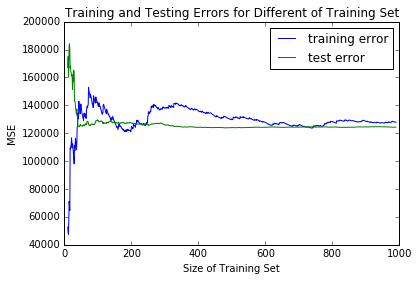

In [559]:
plt.plot(range(10,991),train_errors,label='training error');
plt.plot(range(10,991),test_errors,label='test error');
plt.legend();
plt.xlabel('Size of Training Set')
plt.ylabel('MSE')
plt.title('Training and Testing Errors for Different of Training Set');